# 🐍 **Introducción a Python para el Análisis de Datos**<br>

### 👨‍💻 Jorge Gómez Galván
* LinkedIn: [linkedin.com/in/jorgeggalvan/](https://www.linkedin.com/in/jorgeggalvan/) 
* E-mail: gomezgalvanjorge@gmail.com

## **Capítulo 4: Limpieza de Datos**
---

Los conjuntos de datos suelen contener errores e incoherencias que tienen que eliminarse antes del análisis. En este notebook se introducen las principales operaciones para identificar y corregir estos errores. Se incluyen cuatro pasos clave en la limpieza de datos: el tratamiento de valores nulos, la eliminación de información duplicada, la detección y manejo valores atípicos, y la corrección de campos de texto.

*El notebook ha sido adaptado a partir del trabajo de Juan Martín Bellido, cuyo contenido original se encuentra en [este enlace](https://github.com/jmartinbellido/Python-Curso-Introductorio/blob/main/Capitulo%204%20Limpieza.ipynb).*

### Índice
---

[1. Valores nulos](#4.1---Valores-nulos)  
[2. Valores duplicados](#4.2---Valores-duplicados)  
[3. Outliers o valores atípicos](#4.3---Outliers-o-valores-atípicos)  
[4. Limpieza de campos de tipo de texto](#4.4---Limpieza-de-campos-de-tipo-de-texto)  

### 4.1 - Valores nulos
---

Un valor nulo (`NaN`) es un dato ausente o desconocido dentro de un dataset. Esto es común al analizar datos con información real, debido a errores en la captura, medición o procesamientos de datos, representando una falta de información en el conjunto de datos.

#### Identificar valores nulos en un DataFrame

Pandas proporciona varios formas eficaces para identificar y analizar valores nulos en un DataFrame. A continuación, se presentan métodos para localizar y cuantificar valores nulos en un DataFrame.

##### Localizar valores nulos

Antes de manejar los valores nulos, es necesario localizarlos en el DataFrame a través del método `.isna()`:

> ```python
> df.isna()
> ```

Este método devuelve un DataFrame del mismo tamaño que el original, donde cada celda contiene `True` si el valor es nulo y `False` si no lo es.

Asimismo, al añadir el método `.any()` a `.isna()`, devuelve una serie booleana que indica si hay al menos valor nulo en cada columna del DataFrame.

> ```python
> df.isna().any()
> ```

In [1]:
# Importamos Pandas
import pandas as pd

In [2]:
# Importamos un DataFrame
df_jamesbond = pd.read_csv('./data/james_bond.csv')

In [3]:
# Identificamos si cada valor del DataFrame es nulo o no
df_jamesbond.isna()

,Film,Year,Actor,Director,Shooting Locations,Box Office,Budget,Bond Actor Salary,IMDb Score
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,True,False


In [4]:
# Verificamos si hay algún un valor nulo en cada columna
df_jamesbond.isna().any()

Film                  False
Year                  False
Actor                 False
Director              False
Shooting Locations    False
Box Office            False
Budget                False
Bond Actor Salary      True
IMDb Score            False
dtype: bool

##### Calcular cantidad y porcentaje de valores nulos

Para obtener una visión cuantitativa de los valores nulos, se pueden utilizar `.sum()` y `.mean()`, que permiten calcular el número y el porcentaje de valores nulos por columna, respectivamente.

> ```python
> df.isna().sum()
> ```

> ```python
> df.isna().mean()
> ```

Además, con el método `.info()` se obtiene un resumen que incluye el tipo de dato de cada columna, el número total de filas y la cantidad de valores no nulos presentes en cada una.

> ```python
> df.info()
> ```

In [5]:
# Calculamos la cantidad de nulos que hay en cada columna
df_jamesbond.isna().sum()

Film                  0
Year                  0
Actor                 0
Director              0
Shooting Locations    0
Box Office            0
Budget                0
Bond Actor Salary     9
IMDb Score            0
dtype: int64

In [6]:
# Calculamos la porcentaje de nulos que hay en cada columna
df_jamesbond.isna().mean()

Film                  0.000000
Year                  0.000000
Actor                 0.000000
Director              0.000000
Shooting Locations    0.000000
Box Office            0.000000
Budget                0.000000
Bond Actor Salary     0.333333
IMDb Score            0.000000
dtype: float64

In [7]:
# Calculamos la cantidad de nulos en una columna específica
df_jamesbond['Bond Actor Salary'].isna().sum()

9

In [8]:
# Obtenemos un resumen del DataFrame con el método '.info()'
df_jamesbond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Film                27 non-null     object 
 1   Year                27 non-null     int64  
 2   Actor               27 non-null     object 
 3   Director            27 non-null     object 
 4   Shooting Locations  27 non-null     object 
 5   Box Office          27 non-null     float64
 6   Budget              27 non-null     float64
 7   Bond Actor Salary   18 non-null     float64
 8   IMDb Score          27 non-null     float64
dtypes: float64(4), int64(1), object(4)
memory usage: 2.0+ KB


#### Modificar valores nulos en un DataFrame

Una vez que se han identificado los valores nulos en el DataFrame, se pueden considerar dos principales enfoques para manejarlos:

- Eliminar las filas que contengan al menos un valor nulo en cualquiera de sus columnas.
- Reemplazar los valores nulos con un valor específico, como la media, la mediana o un valor predeterminado.

##### Eliminar filas con valores nulos

Es razonable contemplar la eliminación de filas con valores nulos, particularmente si la cantidad de datos ausentes es baja comparada con el tamaño total del dataset.

Para esto, Pandas cuenta con el método `.dropna()` para eliminar automáticamente cualquier fila que contenga al menos un valor nulo. Al utilizar este método, no es necesario aplicar filtros al DataFrame con condiciones lógicas. Además, cuando sólo aplica eliminar filas con valores nulos en columnas específicas, se puede emplear el parámetro `subset` para limitar la eliminación a dichas variables.

In [9]:
# Eliminamos las filas con al menos un NaN en cualquiera de sus columnas
df_jamesbond.dropna()

,Film,Year,Actor,Director,Shooting Locations,Box Office,Budget,Bond Actor Salary,IMDb Score
0,Dr. No,1962,Sean Connery,Terence Young,"England, Jamaica",448.8,7.0,0.6,7.2
1,From Russia with Love,1963,Sean Connery,Terence Young,"England, Scotland, Italy, Switzerland, Turkey",543.8,12.6,1.6,7.3
2,Goldfinger,1964,Sean Connery,Guy Hamilton,"England, Switzerland, United States",820.4,18.6,3.2,7.7
3,Thunderball,1965,Sean Connery,Terence Young,"England, France, Bahamas, United States",848.1,41.9,4.7,6.9
5,You Only Live Twice,1967,Sean Connery,Lewis Gilbert,"Japan, Spain, Norway",514.2,59.9,4.4,6.8
6,On Her Majesty's Secret Service,1969,George Lazenby,Peter R. Hunt,"England, Switzerland, Portugal",291.5,37.3,0.6,6.7
7,Diamonds Are Forever,1971,Sean Connery,Guy Hamilton,"England, France, Germany, Netherlands, United ...",442.5,34.7,5.8,6.5
14,Octopussy,1983,Roger Moore,John Glen,"England, West Berlin, India",373.8,53.9,7.8,6.5
15,A View to a Kill,1985,Roger Moore,John Glen,"England, Switzerland, Iceland, France, United ...",275.2,54.5,9.1,6.3
16,The Living Daylights,1987,Timothy Dalton,John Glen,"England, Germany, Austria, Italy, Morocco",313.5,68.8,5.2,6.7


In [10]:
# De manera alternativa, pero menos cómoda, realizamos la misma operación utilizando una condición lógica
cond = df_jamesbond['Bond Actor Salary'].isna()

df_jamesbond[-cond] # Negamos la condición para omitir las filas con al menos un NaN

,Film,Year,Actor,Director,Shooting Locations,Box Office,Budget,Bond Actor Salary,IMDb Score
0,Dr. No,1962,Sean Connery,Terence Young,"England, Jamaica",448.8,7.0,0.6,7.2
1,From Russia with Love,1963,Sean Connery,Terence Young,"England, Scotland, Italy, Switzerland, Turkey",543.8,12.6,1.6,7.3
2,Goldfinger,1964,Sean Connery,Guy Hamilton,"England, Switzerland, United States",820.4,18.6,3.2,7.7
3,Thunderball,1965,Sean Connery,Terence Young,"England, France, Bahamas, United States",848.1,41.9,4.7,6.9
5,You Only Live Twice,1967,Sean Connery,Lewis Gilbert,"Japan, Spain, Norway",514.2,59.9,4.4,6.8
6,On Her Majesty's Secret Service,1969,George Lazenby,Peter R. Hunt,"England, Switzerland, Portugal",291.5,37.3,0.6,6.7
7,Diamonds Are Forever,1971,Sean Connery,Guy Hamilton,"England, France, Germany, Netherlands, United ...",442.5,34.7,5.8,6.5
14,Octopussy,1983,Roger Moore,John Glen,"England, West Berlin, India",373.8,53.9,7.8,6.5
15,A View to a Kill,1985,Roger Moore,John Glen,"England, Switzerland, Iceland, France, United ...",275.2,54.5,9.1,6.3
16,The Living Daylights,1987,Timothy Dalton,John Glen,"England, Germany, Austria, Italy, Morocco",313.5,68.8,5.2,6.7


In [11]:
# Eliminamos las filas con valores nulos en la columna 'Bond Actor Salary'
df_jamesbond.dropna(subset=['Bond Actor Salary'])

,Film,Year,Actor,Director,Shooting Locations,Box Office,Budget,Bond Actor Salary,IMDb Score
0,Dr. No,1962,Sean Connery,Terence Young,"England, Jamaica",448.8,7.0,0.6,7.2
1,From Russia with Love,1963,Sean Connery,Terence Young,"England, Scotland, Italy, Switzerland, Turkey",543.8,12.6,1.6,7.3
2,Goldfinger,1964,Sean Connery,Guy Hamilton,"England, Switzerland, United States",820.4,18.6,3.2,7.7
3,Thunderball,1965,Sean Connery,Terence Young,"England, France, Bahamas, United States",848.1,41.9,4.7,6.9
5,You Only Live Twice,1967,Sean Connery,Lewis Gilbert,"Japan, Spain, Norway",514.2,59.9,4.4,6.8
6,On Her Majesty's Secret Service,1969,George Lazenby,Peter R. Hunt,"England, Switzerland, Portugal",291.5,37.3,0.6,6.7
7,Diamonds Are Forever,1971,Sean Connery,Guy Hamilton,"England, France, Germany, Netherlands, United ...",442.5,34.7,5.8,6.5
14,Octopussy,1983,Roger Moore,John Glen,"England, West Berlin, India",373.8,53.9,7.8,6.5
15,A View to a Kill,1985,Roger Moore,John Glen,"England, Switzerland, Iceland, France, United ...",275.2,54.5,9.1,6.3
16,The Living Daylights,1987,Timothy Dalton,John Glen,"England, Germany, Austria, Italy, Morocco",313.5,68.8,5.2,6.7


##### Reemplazar valores nulos

Eliminar filas que contengan al menos un valor nulo puede no ser la mejor solución, ya que se puede perder información valiosa que está disponible en las columnas que no tienen nulos.

Hay varias alternativas para reemplazar los valores nulos:

- **Reemplazo por un valor constante:** sustituye todos los valores nulos por un número específico, como 0 o la media de la columna, con el método `.fillna()`.

- **Reemplazo basado en grupos categóricos:** reemplaza cada valor nulo por la media u otra estadística de una categoría combinando `.groupby().transform('mean')` con `.fillna()`.
  
- **Interpolación de los valores nulos:** reemplaza los valores nulos basándose en los datos circundantes.
    - `ffill()` utiliza el último valor no nulo anterior para completar los nulos.
    - `bfill()` utiliza el siguiente valor no nulo posterior para completar los nulos.

In [12]:
# Reemplazamos todos los nulos del DataFrame con 'Unknown'
df_jamesbond.fillna('Unknown')

,Film,Year,Actor,Director,Shooting Locations,Box Office,Budget,Bond Actor Salary,IMDb Score
0,Dr. No,1962,Sean Connery,Terence Young,"England, Jamaica",448.8,7.0,0.6,7.2
1,From Russia with Love,1963,Sean Connery,Terence Young,"England, Scotland, Italy, Switzerland, Turkey",543.8,12.6,1.6,7.3
2,Goldfinger,1964,Sean Connery,Guy Hamilton,"England, Switzerland, United States",820.4,18.6,3.2,7.7
3,Thunderball,1965,Sean Connery,Terence Young,"England, France, Bahamas, United States",848.1,41.9,4.7,6.9
4,Casino Royale,1967,David Niven,Ken Hughes,"England, Ireland",260.0,70.0,Unknown,5.0
5,You Only Live Twice,1967,Sean Connery,Lewis Gilbert,"Japan, Spain, Norway",514.2,59.9,4.4,6.8
6,On Her Majesty's Secret Service,1969,George Lazenby,Peter R. Hunt,"England, Switzerland, Portugal",291.5,37.3,0.6,6.7
7,Diamonds Are Forever,1971,Sean Connery,Guy Hamilton,"England, France, Germany, Netherlands, United ...",442.5,34.7,5.8,6.5
8,Live and Let Die,1973,Roger Moore,Guy Hamilton,"England, United States, Jamaica",460.3,30.8,Unknown,6.7
9,The Man with the Golden Gun,1974,Roger Moore,Guy Hamilton,"England, Thailand, Hong Kong, Portugal",334.0,27.7,Unknown,6.7


In [13]:
# Reemplazamos todos los nulos de 'Bond Actor Salary' con 0
df_jamesbond['Bond Actor Salary'].fillna(0)

0      0.6
1      1.6
2      3.2
3      4.7
4      0.0
5      4.4
6      0.6
7      5.8
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     7.8
15     9.1
16     5.2
17     7.9
18     5.1
19    10.0
20    13.5
21    17.9
22     3.3
23     8.1
24    14.5
25     0.0
26     0.0
Name: Bond Actor Salary, dtype: float64

In [14]:
# Calculamos la media de 'Bond Actor Salary'
avg_bond_salary = df_jamesbond['Bond Actor Salary'].mean()

# Reemplazamos todos los nulos de 'Bond Actor Salary' con la media
df_jamesbond['Bond Actor Salary'].fillna(avg_bond_salary)

0      0.60
1      1.60
2      3.20
3      4.70
4      6.85
5      4.40
6      0.60
7      5.80
8      6.85
9      6.85
10     6.85
11     6.85
12     6.85
13     6.85
14     7.80
15     9.10
16     5.20
17     7.90
18     5.10
19    10.00
20    13.50
21    17.90
22     3.30
23     8.10
24    14.50
25     6.85
26     6.85
Name: Bond Actor Salary, dtype: float64

👉 En lugar de aplicar un valor constante a toda la columna, es posible sustituir los nulos por una estadística calculada dentro de una categoría mediante la siguiente sintaxis:

> ```python
> df['numeric_column'].fillna(df_jamesbond.groupby('categorical_column')['numeric_column'].transform('agg_function'))
> ```

Hay que tener en cuenta que, si uno de los valores únicos en la variable categórica tiene todos los valores nulos, no se podrá calcular su media, por lo que esos nulos permanecerán sin reemplazar.

In [15]:
# Reemplazamos los nulos de 'Bond Actor Salary' con la media salarial de cada valor único de 'Actor'
df_jamesbond['Bond Actor Salary'].fillna(df_jamesbond.groupby('Actor')['Bond Actor Salary'].transform('mean'))

0      0.600000
1      1.600000
2      3.200000
3      4.700000
4           NaN
5      4.400000
6      0.600000
7      5.800000
8      8.450000
9      8.450000
10     8.450000
11     8.450000
12     8.450000
13     3.383333
14     7.800000
15     9.100000
16     5.200000
17     7.900000
18     5.100000
19    10.000000
20    13.500000
21    17.900000
22     3.300000
23     8.100000
24    14.500000
25     8.633333
26     8.633333
Name: Bond Actor Salary, dtype: float64

In [16]:
# Reemplazamos todos los nulos de 'Bond Actor Salary' con el último valor no nulo anterior
df_jamesbond['Bond Actor Salary'].ffill()

0      0.6
1      1.6
2      3.2
3      4.7
4      4.7
5      4.4
6      0.6
7      5.8
8      5.8
9      5.8
10     5.8
11     5.8
12     5.8
13     5.8
14     7.8
15     9.1
16     5.2
17     7.9
18     5.1
19    10.0
20    13.5
21    17.9
22     3.3
23     8.1
24    14.5
25    14.5
26    14.5
Name: Bond Actor Salary, dtype: float64

In [17]:
# Reemplazamos todos los nulos de 'Bond Actor Salary' con el siguiente valor no nulo posterior
df_jamesbond['Bond Actor Salary'].bfill()

0      0.6
1      1.6
2      3.2
3      4.7
4      4.4
5      4.4
6      0.6
7      5.8
8      7.8
9      7.8
10     7.8
11     7.8
12     7.8
13     7.8
14     7.8
15     9.1
16     5.2
17     7.9
18     5.1
19    10.0
20    13.5
21    17.9
22     3.3
23     8.1
24    14.5
25     NaN
26     NaN
Name: Bond Actor Salary, dtype: float64

### 4.2 - Valores duplicados
---

Los DataFrames a menudo continenen filas duplicadas. En este caso, simplemente se deben identificar las filas repetidas y, en caso  eliminarlas de la tabla de datos.

#### Identificar valores duplicados

Para identificar filas duplicadas en un DataFrame, se utiliza el método `.duplicated()`, el cual devuelve una serie booleana en la que cada fila se marca como `True` si es duplicada y `False` si no lo es.

> ```python
> df.duplicated()
> ```

👉 Por defecto, `.duplicated()` considera una fila duplicada si coincide en todas sus columnas con una fila previa. Sin embargo, al especificar el parámetro `keep=False`, se marcan todas las ocurrencias duplicadas, es decir, tanto la primera aparición como cualquier repetición posterior.

También es posible utilizar el parámetro `subset` para evaluar duplicados únicamente en una o varias columnas específicas, en lugar de considerar todas las columnas del DataFrame:

> ```python
> df.duplicated(subset = ['column_name_1', 'column_name_2'])
> ```

In [18]:
# Importamos un DataFrame
df_starbucks = pd.read_csv('./data/starbucks_beverages.csv')
df_starbucks.head()

,Beverage Category,Beverage,Size,Milk,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (g),Total Carbohydrates (g),Cholesterol (g),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (g)
0,Coffee,Brewed Coffee,Short,NaN,3,0.1,0.0,0.0,0.0,5,0.0,0,0,0.3,0%,0%,0%,0%,0.175
1,Coffee,Brewed Coffee,Short,NaN,3,0.1,0.0,0.0,0.0,5,0.0,0,0,0.3,0%,0%,0%,0%,0.175
2,Coffee,Brewed Coffee,Tall,NaN,4,0.1,0.0,0.0,0.0,10,0.0,0,0,0.5,0%,0%,0%,0%,0.26
3,Coffee,Brewed Coffee,Grande,NaN,5,0.1,0.0,0.0,0.0,10,0.0,0,0,1.0,0%,0%,0%,0%,0.33
4,Coffee,Brewed Coffee,Venti,NaN,5,0.1,0.0,0.0,0.0,10,0.0,0,0,1.0,0%,0%,2%,0%,0.41


In [19]:
# Obtenemos el número total de filas en el DataFrame
len(df_starbucks)

352

In [20]:
# Identificamos las filas duplicadas
df_starbucks.duplicated()

0      False
1       True
2      False
3      False
4      False
       ...  
347    False
348    False
349     True
350    False
351    False
Length: 352, dtype: bool

In [21]:
# Identificamos todas las ocurrencias duplicadas, utilizando el parámetro 'keep=False'
df_starbucks.duplicated(keep=False)

0       True
1       True
2      False
3      False
4      False
       ...  
347    False
348     True
349     True
350    False
351    False
Length: 352, dtype: bool

In [22]:
# Creamos una condición para identificar las filas duplicadas
cond = df_starbucks.duplicated()

# Filtramos el DataFrame para obtener sólo las filas que son duplicadas
duplicates = df_starbucks[cond]
duplicates

,Beverage Category,Beverage,Size,Milk,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (g),Total Carbohydrates (g),Cholesterol (g),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (g)
1,Coffee,Brewed Coffee,Short,NaN,3,0.1,0.0,0.0,0.000,5,0.000,0,0,0.3,0%,0%,0%,0%,0.175
6,Classic Espresso Drinks,Caffe Latte,Short,Nonfat Milk,70,0.1,0.1,0.0,0.005,75,0.010,0,9,6.0,10%,0%,20%,0%,0.075
10,Classic Espresso Drinks,Caffe Latte,Tall,Nonfat Milk,100,0.2,0.2,0.0,0.005,120,0.015,0,14,10.0,15%,0%,30%,0%,0.075
14,Classic Espresso Drinks,Caffe Latte,Grande,Nonfat Milk,130,0.3,0.2,0.0,0.005,150,0.019,0,18,13.0,20%,0%,40%,0%,0.15
18,Classic Espresso Drinks,Caffe Latte,Venti,Nonfat Milk,170,0.4,0.3,0.0,0.010,190,0.025,0,23,16.0,30%,0%,50%,0%,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,Frappuccino Blended Creme,Double Chocolaty Chip (Without Whipped Cream),Grande,Nonfat Milk,260,4.0,3.0,0.0,0.005,250,0.053,2,49,6.0,8%,0%,15%,25%,0.015
337,Frappuccino Blended Creme,Double Chocolaty Chip (Without Whipped Cream),Venti,Nonfat Milk,350,5.0,4.0,0.0,0.005,340,0.071,2,66,9.0,10%,0%,25%,35%,0.015
341,Frappuccino Blended Creme,Green Tea (Without Whipped Cream),Tall,Nonfat Milk,210,0.2,0.1,0.0,0.000,160,0.048,1,47,4.0,6%,10%,15%,2%,0.05
345,Frappuccino Blended Creme,Green Tea (Without Whipped Cream),Grande,Nonfat Milk,280,0.3,0.1,0.0,0.005,220,0.065,1,64,5.0,8%,10%,15%,4%,0.07


In [23]:
# Obtenemos el número de filas duplicadas en el DataFrame
len(duplicates)

87

In [24]:
# Negamos la condición para seleccionar las filas sin duplicados
df_starbucks[-cond]

,Beverage Category,Beverage,Size,Milk,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (g),Total Carbohydrates (g),Cholesterol (g),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (g)
0,Coffee,Brewed Coffee,Short,NaN,3,0.1,0.0,0.0,0.000,5,0.000,0,0,0.3,0%,0%,0%,0%,0.175
2,Coffee,Brewed Coffee,Tall,NaN,4,0.1,0.0,0.0,0.000,10,0.000,0,0,0.5,0%,0%,0%,0%,0.26
3,Coffee,Brewed Coffee,Grande,NaN,5,0.1,0.0,0.0,0.000,10,0.000,0,0,1.0,0%,0%,0%,0%,0.33
4,Coffee,Brewed Coffee,Venti,NaN,5,0.1,0.0,0.0,0.000,10,0.000,0,0,1.0,0%,0%,2%,0%,0.41
5,Classic Espresso Drinks,Caffe Latte,Short,Nonfat Milk,70,0.1,0.1,0.0,0.005,75,0.010,0,9,6.0,10%,0%,20%,0%,0.075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,Frappuccino Blended Creme,Green Tea (Without Whipped Cream),Grande,Whole Milk,320,4.5,2.5,0.1,0.015,220,0.065,1,63,5.0,6%,10%,15%,4%,0.07
347,Frappuccino Blended Creme,Green Tea (Without Whipped Cream),Grande,Soymilk,290,2.5,0.3,0.0,0.000,210,0.063,2,60,5.0,6%,10%,15%,10%,0.07
348,Frappuccino Blended Creme,Green Tea (Without Whipped Cream),Venti,Nonfat Milk,390,0.4,0.1,0.0,0.005,300,0.088,2,87,8.0,10%,15%,25%,6%,0.095
350,Frappuccino Blended Creme,Green Tea (Without Whipped Cream),Venti,Whole Milk,440,7.0,4.0,0.2,0.020,300,0.088,2,86,7.0,10%,15%,20%,6%,0.095


In [25]:
# Obtenemos el número de filas sin duplicados en el DataFrame
len(df_starbucks[-cond])

265

#### Eliminar valores duplicados

El método `.drop_duplicates()` permite eliminar filas duplicadas de manera rápida, manteniendo sólo la primera aparición por defecto y eliminando las restantes.

In [26]:
# Eliminamos las filas duplicadas con el método '.drop_duplicates()'
df_starbucks_clean = df_starbucks.drop_duplicates()
df_starbucks_clean

,Beverage Category,Beverage,Size,Milk,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (g),Total Carbohydrates (g),Cholesterol (g),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (g)
0,Coffee,Brewed Coffee,Short,NaN,3,0.1,0.0,0.0,0.000,5,0.000,0,0,0.3,0%,0%,0%,0%,0.175
2,Coffee,Brewed Coffee,Tall,NaN,4,0.1,0.0,0.0,0.000,10,0.000,0,0,0.5,0%,0%,0%,0%,0.26
3,Coffee,Brewed Coffee,Grande,NaN,5,0.1,0.0,0.0,0.000,10,0.000,0,0,1.0,0%,0%,0%,0%,0.33
4,Coffee,Brewed Coffee,Venti,NaN,5,0.1,0.0,0.0,0.000,10,0.000,0,0,1.0,0%,0%,2%,0%,0.41
5,Classic Espresso Drinks,Caffe Latte,Short,Nonfat Milk,70,0.1,0.1,0.0,0.005,75,0.010,0,9,6.0,10%,0%,20%,0%,0.075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,Frappuccino Blended Creme,Green Tea (Without Whipped Cream),Grande,Whole Milk,320,4.5,2.5,0.1,0.015,220,0.065,1,63,5.0,6%,10%,15%,4%,0.07
347,Frappuccino Blended Creme,Green Tea (Without Whipped Cream),Grande,Soymilk,290,2.5,0.3,0.0,0.000,210,0.063,2,60,5.0,6%,10%,15%,10%,0.07
348,Frappuccino Blended Creme,Green Tea (Without Whipped Cream),Venti,Nonfat Milk,390,0.4,0.1,0.0,0.005,300,0.088,2,87,8.0,10%,15%,25%,6%,0.095
350,Frappuccino Blended Creme,Green Tea (Without Whipped Cream),Venti,Whole Milk,440,7.0,4.0,0.2,0.020,300,0.088,2,86,7.0,10%,15%,20%,6%,0.095


In [27]:
# Obtenemos el número de filas en el DataFrame tras eliminar los duplicados
len(df_starbucks_clean)

265

👉 A través del parámetro `subset`, se pueden especificar una o más columnas clave para eliminar duplicados, considerando como duplicadas aquellas filas que contengan valores idénticos en las columnas seleccionadas.

In [28]:
# Eliminamos el único duplicado (con índice 22), conservando la primera aparición
df_jamesbond.drop_duplicates(subset='Film').tail()

,Film,Year,Actor,Director,Shooting Locations,Box Office,Budget,Bond Actor Salary,IMDb Score
21,Die Another Day,2002,Pierce Brosnan,Lee Tamahori,"England, Spain, Iceland, Norway, United States",465.4,154.2,17.9,6.1
23,Quantum of Solace,2008,Daniel Craig,Marc Forster,"England, Italy, Spain, Panama, Mexico, Chile, ...",514.2,181.4,8.1,6.6
24,Skyfall,2012,Daniel Craig,Sam Mendes,"England, Scotland, Turkey, China",943.5,170.2,14.5,7.8
25,Spectre,2015,Daniel Craig,Sam Mendes,"England, Austria, Italy, Vatican City, Mexico,...",725.5,206.3,NaN,6.8
26,No Time to Die,2021,Daniel Craig,Cary Joji Fukunaga,"England, Scotland, Faroe Islands, Jamaica",396.8,226.4,NaN,7.3


Además, es posible determinar qué ocurrencias duplicadas se conservan con el parámetro `keep`:

- `keep='first'` (por defecto): elimina las filas duplicadas, excepto la primera aparición.
- `keep='last'`: elimina las filas duplicadas, excepto la última aparición.
- `keep=False`: elimina todas las ocurrencias duplicadas, es decir, tanto la primera aparición como cualquier repetición posterior.

In [29]:
# Eliminamos el único duplicado (fila con índice 4), conservando la última aparición
df_jamesbond.drop_duplicates(subset='Film', keep='last').head()

,Film,Year,Actor,Director,Shooting Locations,Box Office,Budget,Bond Actor Salary,IMDb Score
0,Dr. No,1962,Sean Connery,Terence Young,"England, Jamaica",448.8,7.0,0.6,7.2
1,From Russia with Love,1963,Sean Connery,Terence Young,"England, Scotland, Italy, Switzerland, Turkey",543.8,12.6,1.6,7.3
2,Goldfinger,1964,Sean Connery,Guy Hamilton,"England, Switzerland, United States",820.4,18.6,3.2,7.7
3,Thunderball,1965,Sean Connery,Terence Young,"England, France, Bahamas, United States",848.1,41.9,4.7,6.9
5,You Only Live Twice,1967,Sean Connery,Lewis Gilbert,"Japan, Spain, Norway",514.2,59.9,4.4,6.8


### 4.3 - Outliers o valores atípicos
---

Los outliers o valores atípicos son aquellos valores en un conjunto de datos que se desvían significativamente del resto de los datos, ya sea por estar muy por debajo o por encima de la tendencia general. 

👉 En estadística, existen una gran variedad de métodos que permiten definir outliers, siendo los dos más comunes el cálculo del z-score en una distribución normal y el rango intercuartílico (IQR).

La decisión sobre cómo tratar los outliers debe basarse en el objetivo específico del análisis y en la naturaleza de los datos. Dependiendo del contexto y del caso de uso, se puede optar por eliminar los outliers o simplemente identificarlos para comprobar posibles problemas de calidad o inconsistencias en los datos.

#### Z-score (en distribuciones normales)

El z-score es una medida estadística que indica cuántas desviaciones estándar se encuentra un valor específico respecto a la media de un conjunto de datos. En este método, se asume que la variable se distribuye de manera normal.

Los z-scores pueden tomar cualquier valor real, positivo o negativo. En una distribución normal, se sigue la regla empírica o regla 68-95-99.7:

- Aproximadamente el 68% de los datos tienen un z-score entre -1 y 1.
- Aproximadamente el 95% de los datos tienen un z-score entre -2 y 2.
- Aproximadamente el 99,7% de los datos tienen un z-score entre -3 y 3.

👉 Convencionalmente, los valores con un z-score superior a 3 o inferior a -3 se consideran outliers o valores atípicos.

Para calcular el z-score de los valores en una columna específica de un DataFrame, se utiliza la función `zscore` de la librería Spicy, dentro del módulo `scipy.stats`.

> ```python
> stats.zscore(df['column_name'], nan_policy='omit')
> ```

In [30]:
# Importamos el módulo 'stats' de la librería Scipy
from scipy import stats

In [31]:
# Calculamos el z-score de la columna 'Box Office'
df_jamesbond['Box Office Z-Score'] = stats.zscore(df_jamesbond['Box Office'], nan_policy='omit').round(2)

In [32]:
# Mostramos 'Box Office' y su versión normalizada, ordenando por el z-score para observar la distribución de los valores
df_jamesbond[['Box Office', 'Box Office Z-Score']].sort_values('Box Office Z-Score', ascending=False)

,Box Office,Box Office Z-Score
24,943.5,2.62
3,848.1,2.08
2,820.4,1.92
25,725.5,1.38
22,589.4,0.60
1,543.8,0.34
11,535.0,0.29
10,533.0,0.28
18,518.5,0.20
23,514.2,0.17


#### Rango intercuartílico (IQR)

El rango intercuartílico (IQR) es un método menos restrictivo y más robusto para identificar outliers, ya que no depende de la suposición de una distribución normal. Este enfoque se basa en la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1) del conjunto de datos.

El IQR se calcula como la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1) del conjunto de datos:

$$ 
\text{IQR} = Q3 - Q1 
$$

Para identificar outliers utilizando el IQR, se calculan los siguientes límites:

$$
\text{Lower Limit} = Q1 - 1.5 \cdot \text{IQR}
$$

$$
\text{Upper Limit} = Q3 + 1.5 \cdot \text{IQR}
$$

👉 Cualquier valor que se encuentre por debajo del límite inferior o por encima del límite superior se considera un outlier.

##### Visualizar outliers con boxplot

Una forma efectiva de representar gráficamente el IQR y los outliers es mediante la visualización de un boxplot (o diagrama de caja) con el método `.boxplot()`. Un boxplot muestra los cuartiles del conjunto de datos y destaca la existencia de outliers.

👉 Para desplegar el gráfico creado, se emplea la librería Matplotlib, que permite visualizar el gráfico en un notebook mediante la función `plt.show()`.

In [33]:
# Importamos Matplotlib
import matplotlib.pyplot as plt

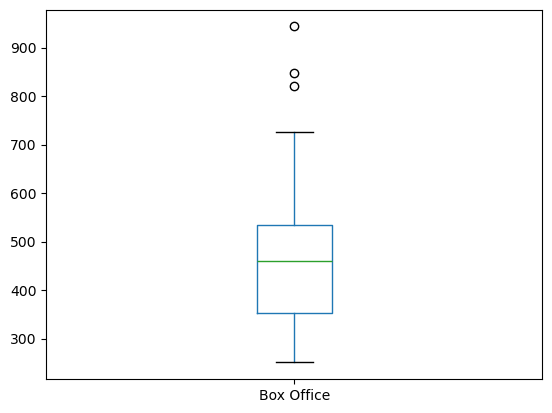

In [34]:
# Creamos un boxplot para la columna 'Box Office'
df_jamesbond.boxplot(column='Box Office', grid=False)

# Utilizamos 'plt.show()' para desplegar el gráfico
plt.show() 

Para visualizar la distribución de una variable en relación con otras categorías, se pueden agrupar los datos utilizando el parámetro `by` en el método `.boxplot()`.

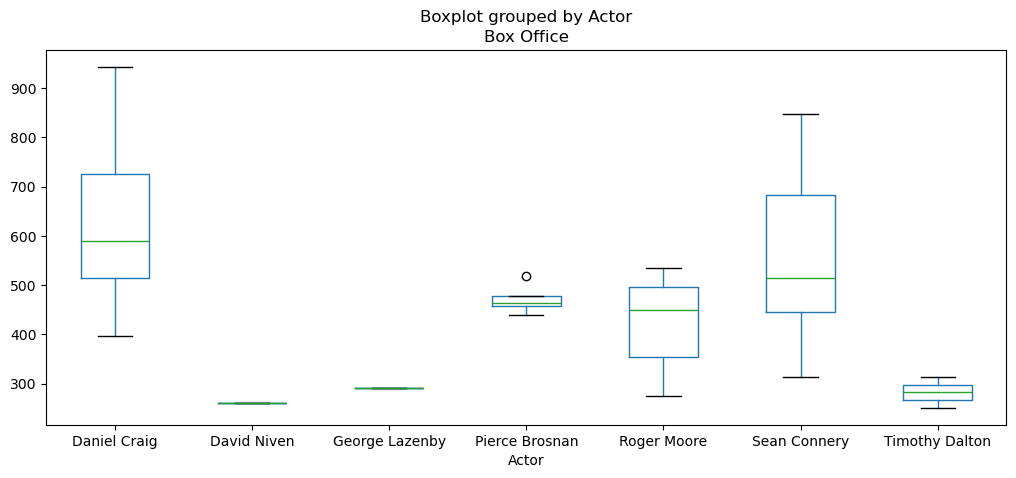

In [35]:
# Creamos un boxplot para la columna 'Box Office' agrupando por 'Actor' con el parámetro 'by'
df_jamesbond.boxplot(column='Box Office', by='Actor', grid=False, figsize=(12, 5))

# Utilizamos 'plt.show()' para desplegar el gráfico
plt.show()

##### Identificar outliers con IQR

Para identificar los outliers utilizando el límite inferior y superior del IQR, es necesario calcular primero los cuartiles Q1 y Q3 del conjunto de datos. Para esto, se emplea el método `.quantile()`, que permite obtener la distribución en cuartiles.

In [36]:
# Calculamos el primer cuartil (Q1), la mediana (Q2) y el tercer cuartil (Q3) de 'Box Office'
Q1 = df_jamesbond['Box Office'].quantile(0.25)
median = df_jamesbond['Box Office'].quantile(0.5)
Q3 = df_jamesbond['Box Office'].quantile(0.75)

In [37]:
# Calculamos el rango intercuartílico
IQR = Q3 - Q1

In [38]:
# Calculamos los límites intercuartílicos (inferior y superior)
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [39]:
# Creamos dos condiciones para filtrar por los límites intercuartílicos
cond_lower = df_jamesbond['Box Office'] > lower_limit
cond_upper = df_jamesbond['Box Office'] < upper_limit

# Filtramos el DataFrame para seleccionar sólo las filas que se encuentran dentro de los límites, es decir, excluyendo los outliers
df_jamesbond[cond_lower & cond_upper].sort_values('Box Office', ascending=False).head()

,Film,Year,Actor,Director,Shooting Locations,Box Office,Budget,Bond Actor Salary,IMDb Score,Box Office Z-Score
25,Spectre,2015,Daniel Craig,Sam Mendes,"England, Austria, Italy, Vatican City, Mexico,...",725.5,206.3,NaN,6.8,1.38
22,Casino Royale,2006,Daniel Craig,Martin Campbell,"England, Italy, Czech Republic, Bahamas, Unite...",589.4,145.3,3.3,8.0,0.60
1,From Russia with Love,1963,Sean Connery,Terence Young,"England, Scotland, Italy, Switzerland, Turkey",543.8,12.6,1.6,7.3,0.34
11,Moonraker,1979,Roger Moore,Lewis Gilbert,"England, France, Italy, United States, Brazil,...",535.0,91.5,NaN,6.2,0.29
10,The Spy Who Loved Me,1977,Roger Moore,Lewis Gilbert,"England, Switzerland, Canada, Scotland, Egypt,...",533.0,45.1,NaN,7.0,0.28


In [40]:
# Filtramos el DataFrame para seleccionar sólo los outliers
df_jamesbond[-cond_lower | -cond_upper].sort_values('Box Office', ascending=False).head()

,Film,Year,Actor,Director,Shooting Locations,Box Office,Budget,Bond Actor Salary,IMDb Score,Box Office Z-Score
24,Skyfall,2012,Daniel Craig,Sam Mendes,"England, Scotland, Turkey, China",943.5,170.2,14.5,7.8,2.62
3,Thunderball,1965,Sean Connery,Terence Young,"England, France, Bahamas, United States",848.1,41.9,4.7,6.9,2.08
2,Goldfinger,1964,Sean Connery,Guy Hamilton,"England, Switzerland, United States",820.4,18.6,3.2,7.7,1.92


In [41]:
# Podemos marcar los outliers de 'Box Office' en una nueva columna
df_jamesbond['Box Office Outlier'] = (df_jamesbond['Box Office'] < lower_limit) | (df_jamesbond['Box Office'] > upper_limit)
df_jamesbond['Box Office Outlier']

0     False
1     False
2      True
3      True
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24     True
25    False
26    False
Name: Box Office Outlier, dtype: bool

### 4.4 - Limpieza de campos de tipo de texto
---

En el proceso de limpieza de datos, es habitual encontrarse con campos de texto que contienen información desorganizada, delimitada o en formatos inconsistentes. La organización y limpieza de estos campos es esencial para facilitar el análisis posterior. Las siguientes técnicas permiten separar, reorganizar y estandarizar datos textuales.

#### Separar campos según delimitador

A menudo, ciertos campos de texto contienen múltiples valores separados por un delimitador, como una coma (`,`), un punto y coma (`;`) o una tabulación (`\t`). Con el método `.str.split(pat='separator')`, es posible dividir estos valores para procesarlos individualmente, ya sea en distintas columnas o filas, según el caso.

In [42]:
# Mostramos las primeras filas de 'Film', 'Year' y 'Shooting Locations' antes de procesar
df_jamesbond[['Film', 'Year', 'Shooting Locations']].head()

,Film,Year,Shooting Locations
0,Dr. No,1962,"England, Jamaica"
1,From Russia with Love,1963,"England, Scotland, Italy, Switzerland, Turkey"
2,Goldfinger,1964,"England, Switzerland, United States"
3,Thunderball,1965,"England, France, Bahamas, United States"
4,Casino Royale,1967,"England, Ireland"


In [43]:
# Dividimos los valores de 'Shooting Locations' en una lista, utilizando la coma como delimitador
df_jamesbond['Shooting Locations'] = df_jamesbond['Shooting Locations'].str.split(pat=',')

# Mostramos nuevamente las primeras filas para comprobar los cambios
df_jamesbond[['Film', 'Year', 'Shooting Locations']].head()

,Film,Year,Shooting Locations
0,Dr. No,1962,"[England, Jamaica]"
1,From Russia with Love,1963,"[England, Scotland, Italy, Switzerland, Tu..."
2,Goldfinger,1964,"[England, Switzerland, United States]"
3,Thunderball,1965,"[England, France, Bahamas, United States]"
4,Casino Royale,1967,"[England, Ireland]"


##### Separar campos delimitados en columnas separadas

Cuando un campo contiene varios valores que deben estar en columnas separadas, el uso del parámetro `expand=True` del método `.str.split()` permite dividir el contenido, creando una columna separada para cada valor.

> ```python
> df['str_column'].str.split(pat='separator', expand=True)
> ```

Adicionalmente, se puede utilizar el parámetro `n` para limitar el número de divisiones que se realizan.

In [44]:
# Volvemos a importar el DataFrame
df_jamesbond = pd.read_csv('./data/james_bond.csv')

In [45]:
# Dividimos los valores de 'Shooting Locations' en máximo de tres columnas
df_jamesbond['Shooting Locations'].str.split(pat=',', expand=True, n=3)

,0,1,2,3
0,England,Jamaica,None,None
1,England,Scotland,Italy,"Switzerland, Turkey"
2,England,Switzerland,United States,None
3,England,France,Bahamas,United States
4,England,Ireland,None,None
5,Japan,Spain,Norway,None
6,England,Switzerland,Portugal,None
7,England,France,Germany,"Netherlands, United States"
8,England,United States,Jamaica,None
9,England,Thailand,Hong Kong,Portugal


In [46]:
# Unimos por índices las columnas 'Film' y 'Year' con las nuevas columnas creadas al dividir 'Shooting Locations'
df_jamesbond[['Film', 'Year']].join(df_jamesbond['Shooting Locations'].str.split(pat=',', expand=True, n=3))

,Film,Year,0,1,2,3
0,Dr. No,1962,England,Jamaica,None,None
1,From Russia with Love,1963,England,Scotland,Italy,"Switzerland, Turkey"
2,Goldfinger,1964,England,Switzerland,United States,None
3,Thunderball,1965,England,France,Bahamas,United States
4,Casino Royale,1967,England,Ireland,None,None
5,You Only Live Twice,1967,Japan,Spain,Norway,None
6,On Her Majesty's Secret Service,1969,England,Switzerland,Portugal,None
7,Diamonds Are Forever,1971,England,France,Germany,"Netherlands, United States"
8,Live and Let Die,1973,England,United States,Jamaica,None
9,The Man with the Golden Gun,1974,England,Thailand,Hong Kong,Portugal


Al dividir una columna que contiene múltiples valores en un DataFrame, los nuevos nombres de las columnas resultantes se nombran automáticamente con números del 0 en adelante. Para que sea más informativo, puede ser útil emplear una list comprehension que genera automáticamente nombres de columnas más descriptivos.

In [47]:
# Almacenamos el DataFrame que contiene las 'Shooting Locations' divididas en columnas separadas (sin límite de columnas)
locations_split = df_jamesbond['Shooting Locations'].str.split(pat=',', expand=True)

# Creamos un bucle para generar nombres de columnas desde 'Shooting Location 1' hasta 'Shooting Location 9'
new_locations_names = [f'Shooting Location {i + 1}' for i in range(9)]
new_locations_names

['Shooting Location 1',
 'Shooting Location 2',
 'Shooting Location 3',
 'Shooting Location 4',
 'Shooting Location 5',
 'Shooting Location 6',
 'Shooting Location 7',
 'Shooting Location 8',
 'Shooting Location 9']

In [48]:
# Creamos una copia del DataFrame con '.copy()' para no modificar el original
df_jamesbond_expanded = df_jamesbond.copy()

# Añadimos las columnas divididas de 'Shooting Locations' utilizando la lista de nombres de columnas generada con la list comprehension
df_jamesbond_expanded[new_locations_names] = locations_split
df_jamesbond_expanded.head()

,Film,Year,Actor,Director,Shooting Locations,Box Office,Budget,Bond Actor Salary,IMDb Score,Shooting Location 1,Shooting Location 2,Shooting Location 3,Shooting Location 4,Shooting Location 5,Shooting Location 6,Shooting Location 7,Shooting Location 8,Shooting Location 9
0,Dr. No,1962,Sean Connery,Terence Young,"England, Jamaica",448.8,7.0,0.6,7.2,England,Jamaica,None,None,None,None,None,None,None
1,From Russia with Love,1963,Sean Connery,Terence Young,"England, Scotland, Italy, Switzerland, Turkey",543.8,12.6,1.6,7.3,England,Scotland,Italy,Switzerland,Turkey,None,None,None,None
2,Goldfinger,1964,Sean Connery,Guy Hamilton,"England, Switzerland, United States",820.4,18.6,3.2,7.7,England,Switzerland,United States,None,None,None,None,None,None
3,Thunderball,1965,Sean Connery,Terence Young,"England, France, Bahamas, United States",848.1,41.9,4.7,6.9,England,France,Bahamas,United States,None,None,None,None,None
4,Casino Royale,1967,David Niven,Ken Hughes,"England, Ireland",260.0,70.0,NaN,5.0,England,Ireland,None,None,None,None,None,None,None


👉 El método `.copy()` en Pandas se utiliza para crear una copia de un DataFrame, permitiendo realizar modificaciones sin afectar los datos originales. Al realizar esta copia, se asegura que cualquier cambio en la nueva variable no altere el DataFrame original.

##### Separar campos delimitados en filas separadas

En determinadas situaciones, resulta muy útil dividir cada valor en una fila independiente para mejorar la estructura de los datos y permitir ciertos cálculos. Usar `.str.split()` en combinación con el método `.explode()` permite dividir cada valor en una nueva fila.

> ```python
> df['str_column'] = df['str_column'].str.split(pat='separator', expand=True)
> df.explode('str_column')
> ```

In [49]:
# Dividimos los valores de 'Shooting Locations' en una lista
df_jamesbond['Shooting Locations'] = df_jamesbond['Shooting Locations'].str.split(pat=',')

# Expandimos los valores de la lista en filas individuales con el método '.explode()', manteniendo la correspondencia con los datos de otras columnas
df_jamesbond = df_jamesbond.explode('Shooting Locations')
df_jamesbond

,Film,Year,Actor,Director,Shooting Locations,Box Office,Budget,Bond Actor Salary,IMDb Score
0,Dr. No,1962,Sean Connery,Terence Young,England,448.8,7.0,0.6,7.2
0,Dr. No,1962,Sean Connery,Terence Young,Jamaica,448.8,7.0,0.6,7.2
1,From Russia with Love,1963,Sean Connery,Terence Young,England,543.8,12.6,1.6,7.3
1,From Russia with Love,1963,Sean Connery,Terence Young,Scotland,543.8,12.6,1.6,7.3
1,From Russia with Love,1963,Sean Connery,Terence Young,Italy,543.8,12.6,1.6,7.3
...,...,...,...,...,...,...,...,...,...
25,Spectre,2015,Daniel Craig,Sam Mendes,Morocco,725.5,206.3,NaN,6.8
26,No Time to Die,2021,Daniel Craig,Cary Joji Fukunaga,England,396.8,226.4,NaN,7.3
26,No Time to Die,2021,Daniel Craig,Cary Joji Fukunaga,Scotland,396.8,226.4,NaN,7.3
26,No Time to Die,2021,Daniel Craig,Cary Joji Fukunaga,Faroe Islands,396.8,226.4,NaN,7.3


#### Reemplazar valores

Para estandarizar y limpiar los valores en un campo de texto, el método `.replace()` permite reemplazar valores específicos en una columna. Esto ayuda a corregir errores, homogenizar formatos y adecuar los datos textuales a un formato uniforme antes de analizarlos.

> ```python
> df['str_column'].str.replace('string_to_replace', 'replacement_string')
> ```

Además, se puede aplicar a múltiples valores de manera simultánea con un diccionario.

> ```python
> df['str_column'].str.replace({'string_to_replace_1':'replacement_string_1', 'string_to_replace_2':'replacement_string_2'})
> ```

👉 Este método puede utilizarse no sólo para cadenas de texto, sino también para números y otros tipos de datos.

##### Reemplazar valores de campos categóricos

In [50]:
# Reemplazamos los valores 'England' por 'UK' dentro de la columna 'Shooting Locations'
df_jamesbond['Shooting Locations'] = df_jamesbond['Shooting Locations'].str.replace('England', 'UK')
df_jamesbond.head()

,Film,Year,Actor,Director,Shooting Locations,Box Office,Budget,Bond Actor Salary,IMDb Score
0,Dr. No,1962,Sean Connery,Terence Young,UK,448.8,7.0,0.6,7.2
0,Dr. No,1962,Sean Connery,Terence Young,Jamaica,448.8,7.0,0.6,7.2
1,From Russia with Love,1963,Sean Connery,Terence Young,UK,543.8,12.6,1.6,7.3
1,From Russia with Love,1963,Sean Connery,Terence Young,Scotland,543.8,12.6,1.6,7.3
1,From Russia with Love,1963,Sean Connery,Terence Young,Italy,543.8,12.6,1.6,7.3


##### Reemplazar valores de campos numéricos

In [51]:
# Mostramos las columnas numéricas a modificar
df_starbucks[['Vitamin A (% DV)', 'Vitamin C (% DV)', 'Calcium (% DV)', 'Iron (% DV)']].head()

,Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV)
0,0%,0%,0%,0%
1,0%,0%,0%,0%
2,0%,0%,0%,0%
3,0%,0%,0%,0%
4,0%,0%,2%,0%


In [52]:
# Reemplazamos el símbolo '%' por una cadena vacía, eliminando así este carácter
df_starbucks[['Vitamin A (% DV)', 'Vitamin C (% DV)', 'Calcium (% DV)', 'Iron (% DV)']].replace('%', '').head()

,Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV)
0,0%,0%,0%,0%
1,0%,0%,0%,0%
2,0%,0%,0%,0%
3,0%,0%,0%,0%
4,0%,0%,2%,0%


👉 Utiliza sólo `.replace()` (sin el método `.str`) cuando se aplique la operación a varias columnas al mismo tiempo.

### 4.5 - Ejercicios
---

📘 Puedes encontrar las soluciones a los ejercicios [aquí](https://github.com/jorgeggalvan/Data-Analysis-Fundamentals-with-Python/blob/main/Python_Data_Analysis_4.2_Exercises.ipynb).

#### Ejercicio 4.1

> Dataset a utilizar: `fortune_1000.csv`

**4.1A:** Identifica las columnas con valores nulos en el DataFrame.

**4.1B:** Calcula la cantidad de empresas con al menos un valor nulo en alguna de las columnas del DataFrame.

**4.1C:** Elimina las filas que contienen valores nulos en la columna 'Profits'.

##### Ejercicio 4.1A

In [ ]:
# Escribe la solución al ejercicio aquí

##### Ejercicio 4.1B

In [ ]:
# Escribe la solución al ejercicio aquí

##### Ejercicio 4.1C

In [ ]:
# Escribe la solución al ejercicio aquí

#### Ejercicio 4.2

> Dataset a utilizar: `european_countries_long.csv`

**4.2A:** Identifica y muestra las filas con valores nulos en cualquiera de las columnas del DataFrame.

**4.2B:** Completa los valores nulos identificados, reemplazándolos con el siguiente valor no nulo de la misma columna.

##### Ejercicio 4.2A

In [ ]:
# Escribe la solución al ejercicio aquí

##### Ejercicio 4.2B

In [ ]:
# Escribe la solución al ejercicio aquí

#### Ejercicio 4.3

> Dataset a utilizar: `imdb_movies.csv`

**4.3A:** Elimina las películas con títulos duplicados ('movie_title'), manteniendo la última aparición de cada título, ya que representa el registro más actualizado.

**4.3B:** Calcula y muestra la cantidad de valores nulos presentes en cada columna del DataFrame.

**4.3C:** Reemplaza los valores nulos de la columna 'duration' por la duración media de las películas.

**4.3D:** Reemplaza los valores nulos de las columnas 'gross' y 'budget' por la etiqueta 'Unknown'.

##### Ejercicio 4.3A

In [ ]:
# Escribe la solución al ejercicio aquí

##### Ejercicio 4.3B

In [ ]:
# Escribe la solución al ejercicio aquí

##### Ejercicio 4.3C

In [ ]:
# Escribe la solución al ejercicio aquí

##### Ejercicio 4.3D

In [ ]:
# Escribe la solución al ejercicio aquí

#### Ejercicio 4.4

> Dataset a utilizar: `amzn_stock.csv`

**4.4A:** Identifica los outliers del campo 'Volume' utilizando el método de z-score, considerando outliers aquellos valores con z-score superior a 3.

**4.4B:** Identifica los outliers del campo 'Volume' utilizando el rango intercuartílico (IQR).

##### Ejercicio 4.4A

In [ ]:
# Escribe la solución al ejercicio aquí

##### Ejercicio 4.4B

In [ ]:
# Escribe la solución al ejercicio aquí

#### Ejercicio 4.5

> Dataset a utilizar: `world_countries.csv`

Crea un boxplot (o diagrama de caja) para visualizar la distribución de la esperanza de vida al nacer, agrupando la información entre países por continente.

In [ ]:
# Escribe la solución al ejercicio aquí

#### Ejercicio 4.6

> Dataset a utilizar: `amazon_products.csv`

**4.6A:** Limpia las categorías de productos, diviendo la columna 'Categories' hasta extraer las 4 primeras para cada producto.

**4.6B:** Calcula la puntuación promedio de las reseñas ('Reviews Rating') agrupadas por la categoría principal y la primera subcategoría.

##### Ejercicio 4.6A

In [ ]:
# Escribe la solución al ejercicio aquí

##### Ejercicio 4.6B

In [ ]:
# Escribe la solución al ejercicio aquí

#### Ejercicio 4.7

> Dataset a utilizar:  `starbucks_beverages.csv`

**4.7A:** Elimina las filas duplicadas del dataset.

**4.7B:** Calcula la cantidad de valores nulos en el campo 'Milk' y reemplaza estos valores con la etiqueta "Without Milk"

**4.7C:** Separa los componentes del campo 'Beverage' en dos columnas nuevas ('Beverage' y 'Toppings'), eliminando los paréntesis para limpiar los datos.

**4.7D:** Crea una nueva columna llamada 'Size (fl oz)' que contenga la capacidad en onzas líquidas correspondientes al tamaño de cada bebida, según las siguientes equivalencias:

- Short (8 fl oz)
- Tall (12 fl oz)
- Grande (16 fl oz)
- Venti (24 fl oz)

##### Ejercicio 4.7A

In [ ]:
# Escribe la solución al ejercicio aquí

##### Ejercicio 4.7B

In [ ]:
# Escribe la solución al ejercicio aquí

##### Ejercicio 4.7C

In [ ]:
# Escribe la solución al ejercicio aquí

##### Ejercicio 4.7D

In [ ]:
# Escribe la solución al ejercicio aquí

#### Ejercicio 4.8

> Dataset a utilizar:  `imdb_movies.csv`

Obtén el ranking de los 5 géneros cinematográficos que tienen la mayor cantidad de películas en el dataset y calcula su puntuación mediana en IMDb.

In [ ]:
# Escribe la solución al ejercicio aquí